In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.integrate import odeint

# Figure parameters
newparams = {'figure.figsize': (20, 8),
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

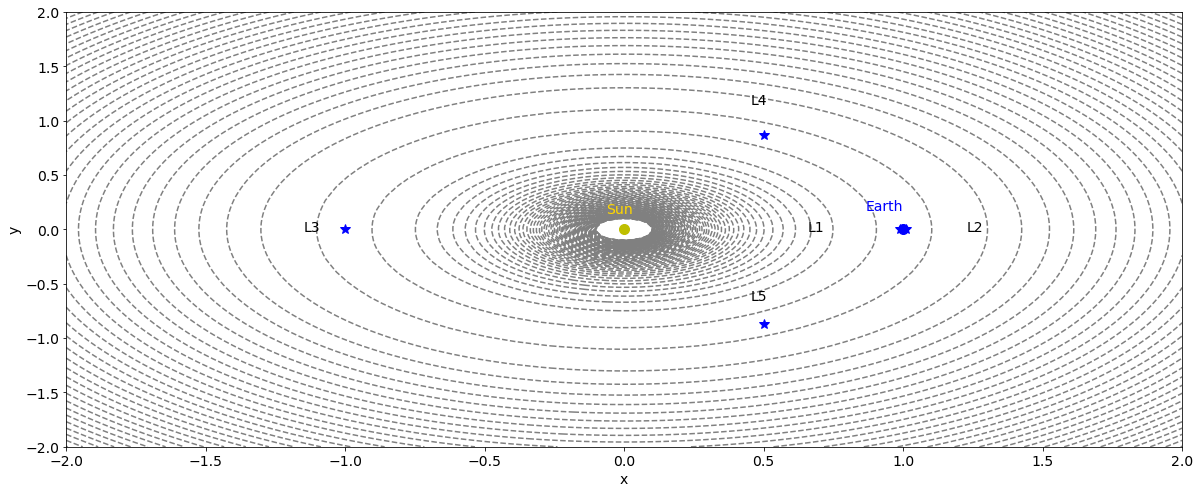

In [4]:
def plot_Pot():

    if SS == True:                        # Solar System Picture
        x = np.linspace(-2.0, 2.0, 100)
        y = np.linspace(-2.0, 2.0, 100)
    else:                                 # Earth Close Up 
        x = np.linspace(0.9, 1.06, 100)
        y = np.linspace(-0.1, 0.1, 100)
    
    X,Y = np.meshgrid(x,y)

    V = -1/2*w**2*(X**2+Y**2) - mu_s/np.sqrt((X+mu_e)**2+Y**2) - mu_e/np.sqrt((X-mu_s)**2+Y**2)
    levels = np.linspace(-10, 0, 100)
    plt.contour(X, Y, V, levels, colors='0.5')
    
if __name__ == '__main__':

    SS = True
    w = 1

    # Actual Sun and Earth Mass Relation:
    mu_s = 1.0/(1.0 + 3.0e-6) 
    mu_e = 1.0 - mu_s   

    # Demonstrative
    # mu_s = 0.98
    # mu_e = 1.0 - mu_s


    plt.plot(1-(mu_e/3)**(1/3), 0, 'b*')
    plt.figtext(0.75, 0.5, "L2")
    plt.plot(1+(mu_e/3)**(1/3), 0, 'b*')
    plt.figtext(0.64, 0.5, "L1")
    plt.plot(-(1+5/12*mu_e), 0, 'b*')
    plt.figtext(0.29, 0.5, "L3")
    plt.plot(0.5*(mu_s-mu_e), np.sqrt(3)/2, 'b*')
    plt.figtext(0.6, 0.72, "L4")
    plt.plot(0.5*(mu_s-mu_e), -np.sqrt(3)/2, 'b*')
    plt.figtext(0.6, 0.38, "L5")

    plt.plot(mu_s, 0, 'bo', -mu_e, 0, 'yo')
    plt.figtext(0.5, 0.53, "Sun", color = 'gold')
    plt.figtext(0.68, 0.535, "Earth",color = 'b')

    #plt.title("Effective Potential Field in Circular Restricted Three-body System")
    plt.xlabel('x')
    plt.ylabel('y')
    
    plot_Pot()

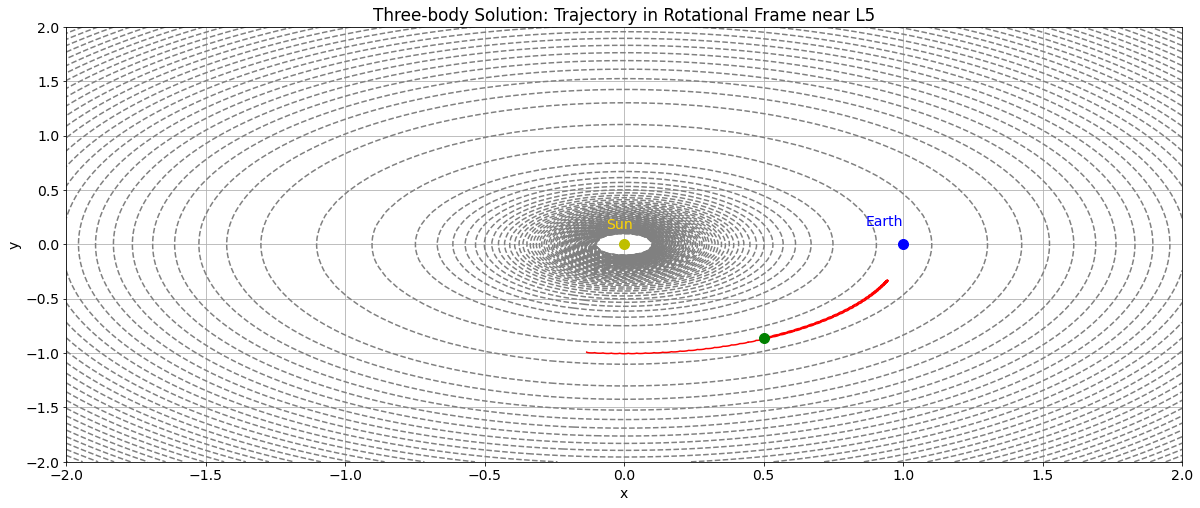

In [5]:
def L_r(y:np.array, t: float, w, mu_s, mu_e): # System of ODE of Three-body in rotating frame

    r_e = np.sqrt((y[0]-mu_s)**2+y[1]**2) # distance to earth from COM
    r_s = np.sqrt((y[0]+mu_e)**2+y[1]**2) # distance to sun from COM

    dy = np.zeros(4) # ([dx, dy, ddx, ddy])
    dy[0] = y[2]     
    dy[1] = y[3]
    dy[2] = +2*w*y[3] + w**2*y[0] - mu_s*(y[0]+mu_e)/r_s**3 - mu_e*(y[0]-mu_s)/r_e**3
    dy[3] = -2*w*y[2] + w**2*y[1] - mu_s*y[1]/r_s**3 - mu_e*y[1]/r_e**3

    return dy
        
if __name__ == '__main__':

    end_t = 500.0
    total_step = 100000
    tlist = np.linspace(0.0, end_t, total_step)
    w = 1

    # initial values of satellite

    Lag = 5      # Which Lagrange Point?

    if Lag == 1:
        y0 = np.zeros(4)                     # ([x, y, dx, dy])
        y0[0] = (1 - (mu_e/3)**(1/3))        # x
        y0[1] = 0.0                          # y
        y0[2] = 0.00                         # u  dx
        y0[3] = 0.0                            # v  dy
    elif Lag == 2:
        y0 = np.zeros(4) # ([x, y, dx, dy])
        y0[0] = (1 + (mu_e/3)**(1/3))      # x
        y0[1] = 0.0                        # y
        y0[2] = 0.0                             # u  dx
        y0[3] = 0.0                      # v  dy
    elif Lag == 3:
        y0 = np.zeros(4) # ([x, y, dx, dy])
        y0[0] = -(1 + 5/12*mu_e)           # x
        y0[1] = 0.0                        # y
        y0[2] = 0.0                           # u  dx
        y0[3] = 0.0                      # v  dy
    elif Lag == 4:
        y0 = np.zeros(4) # ([x, y, dx, dy])
        y0[0] = 0.5 * (mu_s-mu_e)          # x
        y0[1] = np.sqrt(3)/2               # y
        y0[2] = 0.00                             # u  dx
        y0[3] = 0                      # v  dy
    elif Lag == 5:
        y0 = np.zeros(4) # ([x, y, dx, dy])
        y0[0] = 0.5*(mu_s-mu_e)            # x
        y0[1] = -np.sqrt(3)/2       # y
        y0[2] = 0.00                             # u  dx
        y0[3] = 0.000                      # v  dy

    # uncomment this for revolving the Earth
    # y0 = np.zeros(4) # ([x, y, dx, dy])
    # y0[0] = mu_s + 0.01 
    # y0[1] = 0.00
    # y0[2] = 0.00                             # u  dx
    # y0[3] = w*y0[0] +0.5                # v  dy

    Lag_sol_r = odeint(L_r, y0, tlist, rtol=1e-10, args = (w, mu_s, mu_e)) # Iteration of odeint to solve trajectory
    
    SS = True
    plt.figure()
    plt.title(f'Three-body Solution: Trajectory in Rotational Frame near L{Lag}')
    plt.plot(Lag_sol_r[:,0],Lag_sol_r[:,1], 'r')
    plt.plot(Lag_sol_r[0,0],Lag_sol_r[0,1], 'go')             
    plot_Pot()
    if SS == True:
        plt.plot(mu_s, 0, 'bo', -mu_e, 0, 'yo')
        plt.figtext(0.5, 0.53, "Sun", color = 'gold')
        plt.figtext(0.68, 0.535, "Earth",color = 'b')
    else:
        plt.plot(mu_s,0,'bo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()